#Load and summarize dataset
Lets load and summarize the train datasets given on CTR_Email_Campaign

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option("display.max_columns", None)
df = pd.read_csv("https://raw.githubusercontent.com/Jaiprakash91194/CTR_Email_Campaign/main/train_data.csv")
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


#Exploratory Data Analysis
Lets perform EDA to understand more about the data:
- Missing Values
- All the Numerical Variables
- Distribution of Numerical Variables(Since this is regression problem, we need to check the  distribution data whether the distribution is skewed)
- Categorical Variables
- Cardinality of Categorical Variables
- Outliers
- Relationship between independent and dependent variables(Click Rate).

#Missing values
Lets check whether we have any missing values in the dataset and handle them


In [2]:
df.isna().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

campaigh_id is unique and will lead to overfitting. Hence removing the feature

In [3]:
df.drop("campaign_id", axis=1, inplace=True)

From above data, we see there are no missing values in our dataset.

#Qualitative Features

In [4]:
qualitative_features = []
quantitative_features = []
for feature in df.columns:
  if len(df[feature].unique()) < 25:
    qualitative_features.append(feature)
    print("Feature: {} has {} classes --> {}".format(feature, len(df[feature].unique()), sorted(df[feature].unique())))
  else:
    quantitative_features.append(feature)

Feature: sender has 12 classes --> [0, 1, 2, 3, 6, 7, 9, 10, 11, 12, 14, 15]
Feature: day_of_week has 7 classes --> [0, 1, 2, 3, 4, 5, 6]
Feature: is_weekend has 2 classes --> [0, 1]
Feature: times_of_day has 3 classes --> ['Evening', 'Morning', 'Noon']
Feature: category has 16 classes --> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Feature: is_image has 6 classes --> [0, 1, 2, 3, 4, 6]
Feature: is_personalised has 2 classes --> [0, 1]
Feature: is_quote has 7 classes --> [0, 1, 2, 3, 4, 5, 6]
Feature: is_timer has 1 classes --> [0]
Feature: is_emoticons has 6 classes --> [0, 1, 2, 3, 4, 6]
Feature: is_discount has 2 classes --> [0, 1]
Feature: is_price has 8 classes --> [0, 1000, 1399, 4999, 5000, 5499, 8000, 14999]
Feature: is_urgency has 2 classes --> [0, 1]
Feature: target_audience has 17 classes --> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


From above data we see "is_timer" columns has only one class and is not going to affect the output class. Hence we can drop the feature.

In [5]:
df.drop("is_timer", axis=1, inplace=True)
qualitative_features.remove("is_timer")

#Feature Engineering

Segregate the Numerical features and Categorical features

In [6]:
pd.DataFrame(df.dtypes.value_counts()).T

,int64,object,float64
0,18,1,1


There are 18 Integer feature and 1 Object feature.

Lets segregate the features with unique classess less than 25 as qualitative features and check the relationship between feature categorical feature and target. Also relationship between a feature and target.

In [7]:
integer_data_cols = df.select_dtypes(include="int64").columns
object_data_cols = df.select_dtypes(include="object").columns

Lets check the distribution Object feature(TimesOfDay) and apply required encoding to convert them to Numeric feature

In [8]:
df['times_of_day'].value_counts()

Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64

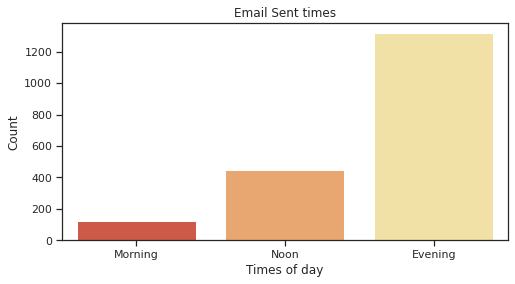

In [9]:
plt.figure(figsize=(8,4))
sns.set_theme(style='ticks',palette='RdYlGn')

sns.countplot(df['times_of_day'],order=df['times_of_day'].value_counts().index[::-1])
plt.xlabel('Times of day')
plt.ylabel('Count')
plt.title('Email Sent times')
plt.show()

Since the data is Ordinal, lets apply Label Encoding the convert the features to Numeric 

--> Evening(2), Noon(1), Morning(0)

In [10]:
df['times_of_day'] = df['times_of_day'].map({"Evening": 2, "Noon": 1, "Morning": 0}).astype("int64")

In [11]:
df.query("day_of_week == 5 or day_of_week == 6")["is_weekend"].value_counts()

1    377
Name: is_weekend, dtype: int64

In [12]:
df.is_weekend.value_counts()

0    1511
1     377
Name: is_weekend, dtype: int64

In [13]:
df[["day_of_week","is_weekend"]].corr()

,day_of_week,is_weekend
day_of_week,1.000000,0.720599
is_weekend,0.720599,1.000000


Since Feature: day_of_week is highly correlated with is_weekend, lets drop the feature: day_of_week.

In [14]:
df.drop("day_of_week", axis=1, inplace=True)
qualitative_features.remove("day_of_week")

In [15]:
qualitative_features

['sender',
 'is_weekend',
 'times_of_day',
 'category',
 'is_image',
 'is_personalised',
 'is_quote',
 'is_emoticons',
 'is_discount',
 'is_price',
 'is_urgency',
 'target_audience']

In [16]:
boolean_features = ['is_weekend', 'is_personalised', 'is_discount', 'is_urgency', 'is_price']
boolean_features

['is_weekend', 'is_personalised', 'is_discount', 'is_urgency', 'is_price']

#Interpretations:
Lets check the Distribution of Boolean features to draw more insights about the data

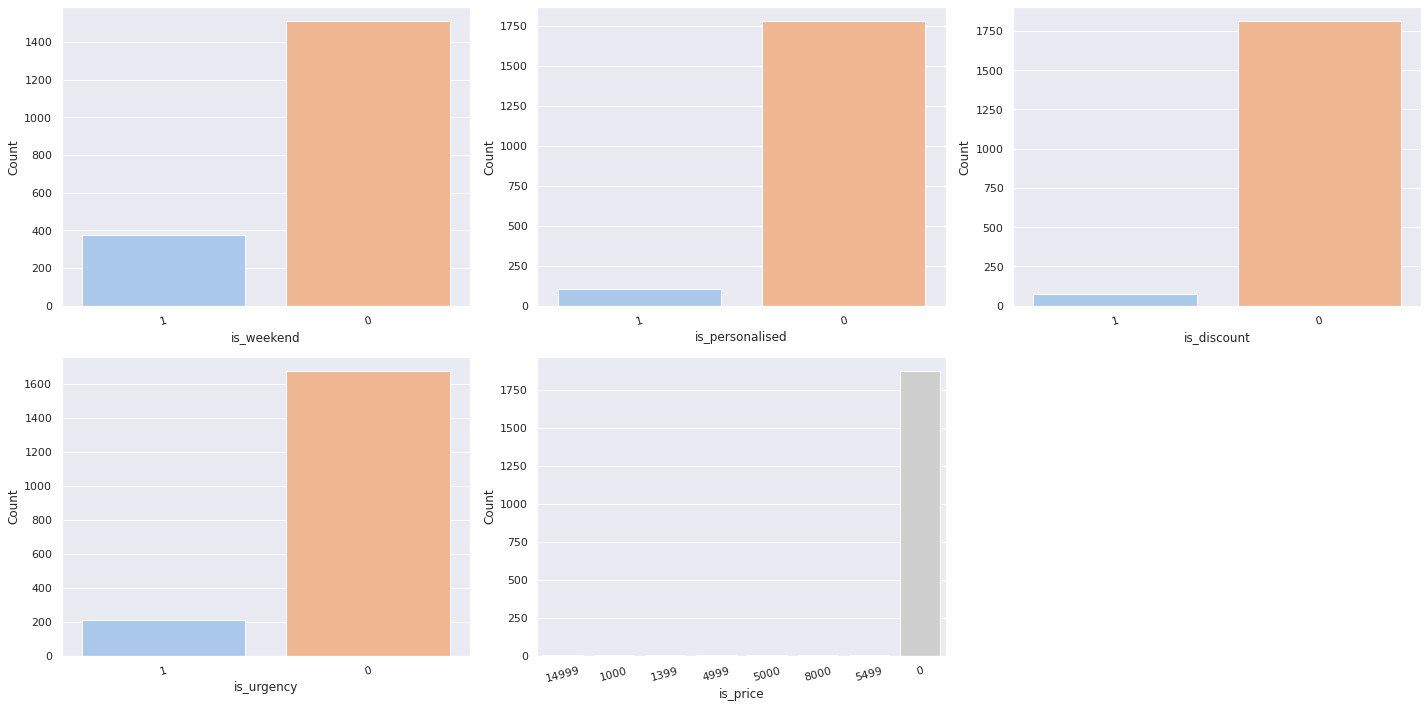

In [17]:
sns.set_theme(style='darkgrid',palette='pastel')

try:
  plt.figure(figsize=(20,10))
  i = 230
  for feature in boolean_features:
      i += 1
      plt.subplot(i)
      sns.countplot(df[feature], order=df[feature].value_counts().index[::-1])
      plt.xticks(rotation=15)
      plt.xlabel(feature)
      plt.ylabel("Count")
except ValueError:
  pass

plt.tight_layout()
plt.show()

In [18]:
df["is_price"].value_counts()

0        1875
5499        5
8000        2
5000        2
4999        1
1399        1
1000        1
14999       1
Name: is_price, dtype: int64

From above visualization, we see the values other an boolean values are negligible comparing to 0 and 1. Hence replacing the values greater than 1 into 1(As it represent true value for the data)

In [19]:
for feature in boolean_features:
  if len(df[feature].unique()) > 2: 
    print(feature)

is_price


There is very less relationship for the feature: "is_price" to the Target variable. So removing the feature: "is_price"

In [20]:
df.drop("is_price", axis=1, inplace=True)
qualitative_features.remove("is_price")

#Data Visualization
#Feature vs Target
Lets check the relationship of each feature with target: **Categorical Features**

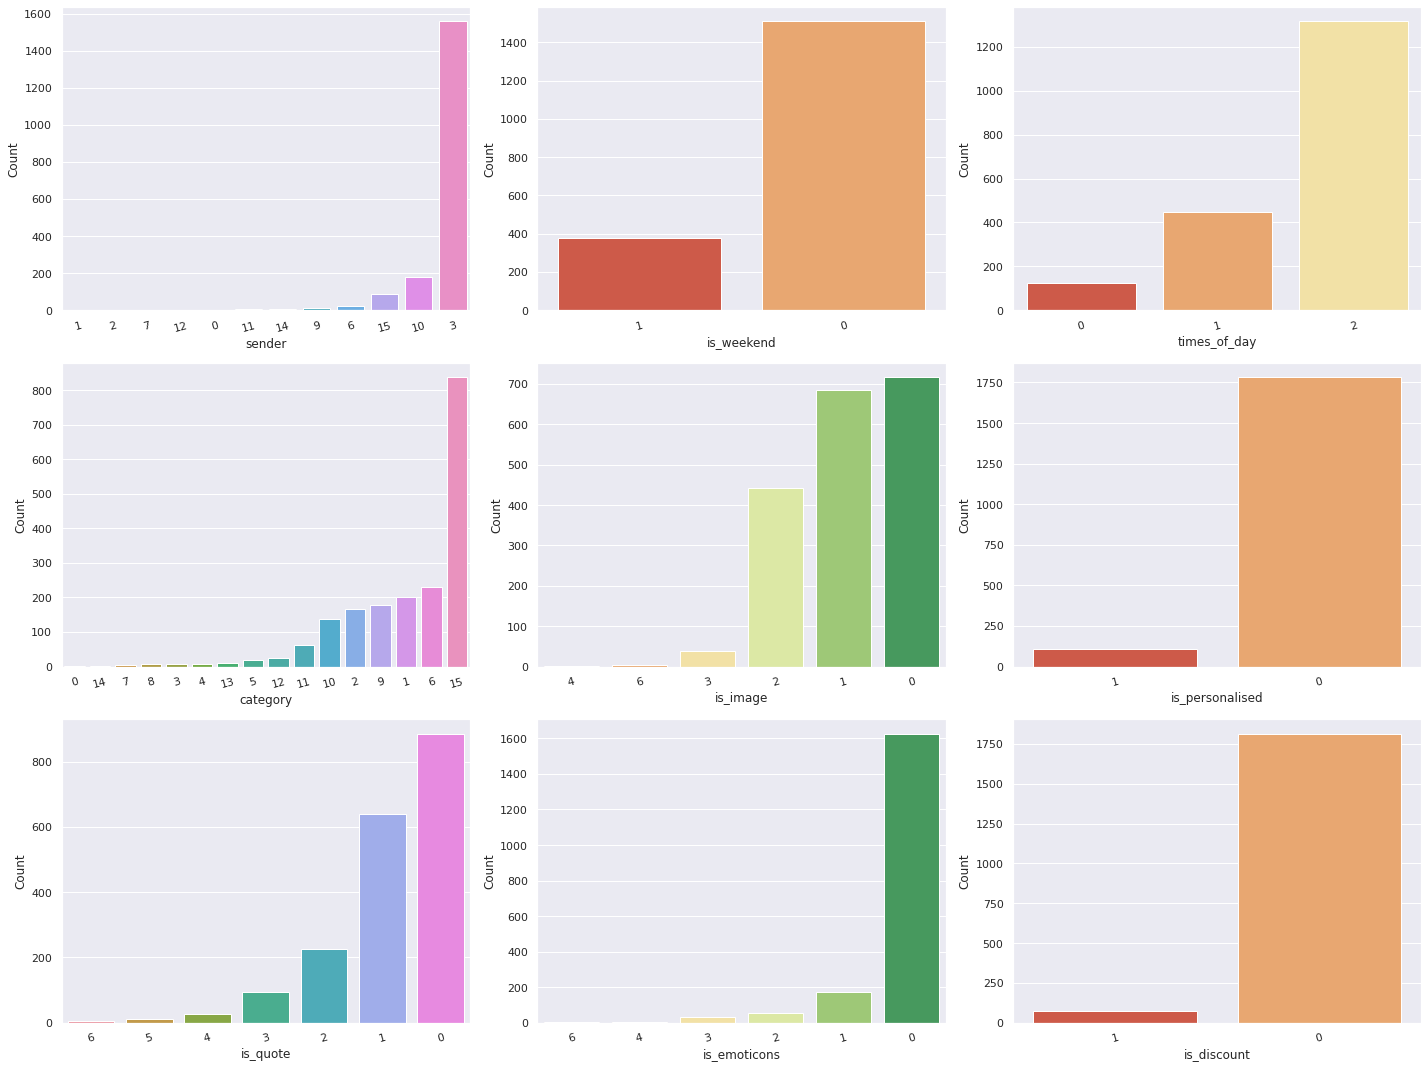

In [21]:
sns.set_theme(style='darkgrid',palette='RdYlGn')

try:
  plt.figure(figsize=(20,15))
  i = 330
  for feature in qualitative_features[:10]:
    i += 1
    plt.subplot(i)
    sns.countplot(df[feature], order=df[feature].value_counts().index[::-1])
    plt.xticks(rotation=15)
    plt.xlabel(feature)
    plt.ylabel("Count")
except ValueError:
  pass

plt.tight_layout()
plt.show()

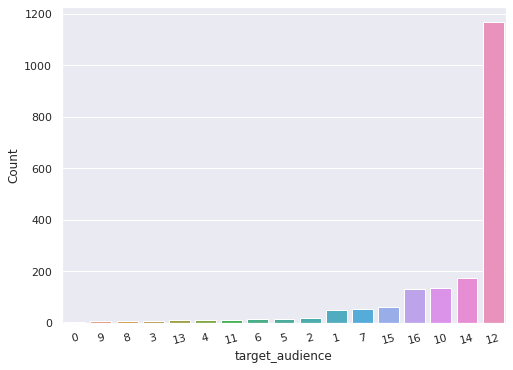

In [22]:
sns.set_theme(style='darkgrid',palette='pastel')

try:
  plt.figure(figsize=(20,15))
  i = 330
  for feature in qualitative_features[10:]:
    i += 1
    plt.subplot(i)
    sns.countplot(df[feature], order=df[feature].value_counts().index[::-1])
    plt.xticks(rotation=15)
    plt.xlabel(feature)
    plt.ylabel("Count")
except ValueError:
  pass

plt.tight_layout()
plt.show()

Since Campaign_ID is unique, lets remove the feature as it will lead to overfitting

Also remove click_rate as that is the target variable to be predicted by the model.

Since Clickrate is the Target variable, lets remove the feature from quantitative features  list

In [23]:
quantitative_features.remove("click_rate")

#Handle Outliers
Since most of the Regression models(Linear Regression, KNN, SVR etc) are sensitive to Outliers, lets check the distribution of data and handle the outliers.

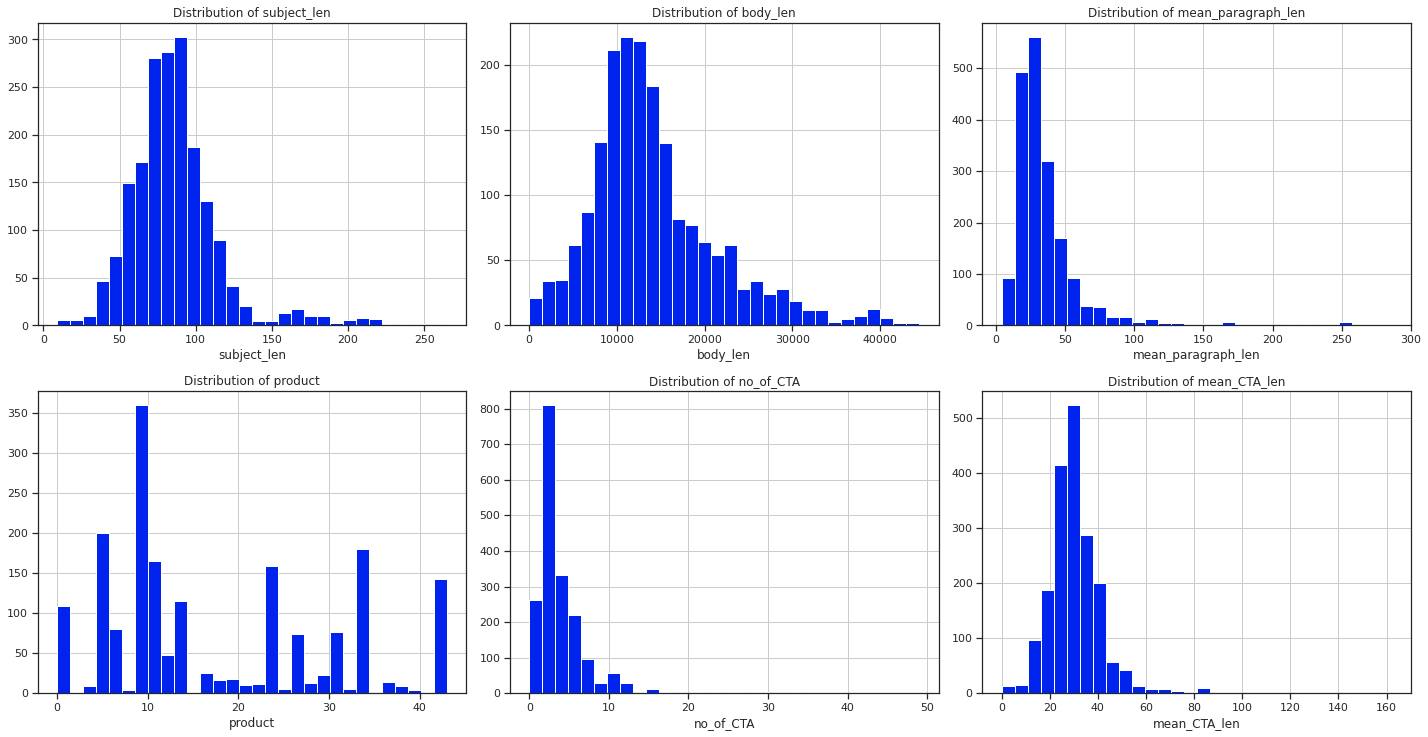

In [24]:
sns.set_theme(style='ticks',palette="winter")
i = 330
plt.figure(figsize=(20,15))
for feature in quantitative_features:
  i += 1
  plt.subplot(i)
  df[feature].hist(bins=30)
  title1="Distribution of " + feature
  plt.xlabel(feature)
  plt.title(title1)

plt.tight_layout()
plt.show()

From above graph, below is the distribution of data

**Normal Distribution:** subject_len, body_len

**Skewed Distribution:** mean_paragraph_len, no_of_CTA, mean_CTA_len

In [25]:
df["subject_len"].describe()

count    1888.000000
mean       86.246292
std        30.143206
min         9.000000
25%        69.000000
50%        83.000000
75%        98.000000
max       265.000000
Name: subject_len, dtype: float64

The feature: subject_len  is Normally Distributed, but there are Outliers in the data with:
- Mean: 86.24
- Max value: 265

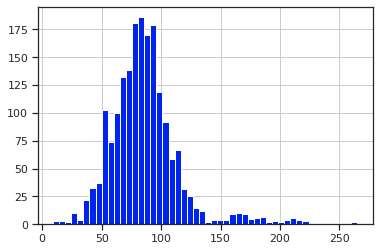

In [26]:
df.subject_len.hist(bins=50)

**Gaussian Distribution Outliers**

lets calculate the IQR to differentiate the Outliers and handle them.

In [27]:
sns.set_theme(style='whitegrid',palette='winter')

def plot_graph(dataframe, dataframe1, feature):
  plt.figure(figsize=(15,6))
  plt.subplot(121)
  sns.distplot(dataframe[feature])
  plt.title("Distribution of feature with Outlier")
  plt.subplot(122)
  sns.distplot(dataframe1[feature])
  plt.title("Distribution of feature after removing outliers")

def handle_outlier(feature):
  data = df.copy()
  IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
  lower_fence = df[feature].quantile(0.25) - 1.5*IQR
  upper_fence = df[feature].quantile(0.75) + 1.5*IQR
  data.loc[data[feature] > upper_fence, feature] = int(upper_fence)
  plot_graph(df, data, feature)
  plt.tight_layout()
  plt.show()
  df[feature] = data[feature]


In [28]:
quantitative_features

['subject_len',
 'body_len',
 'mean_paragraph_len',
 'product',
 'no_of_CTA',
 'mean_CTA_len']

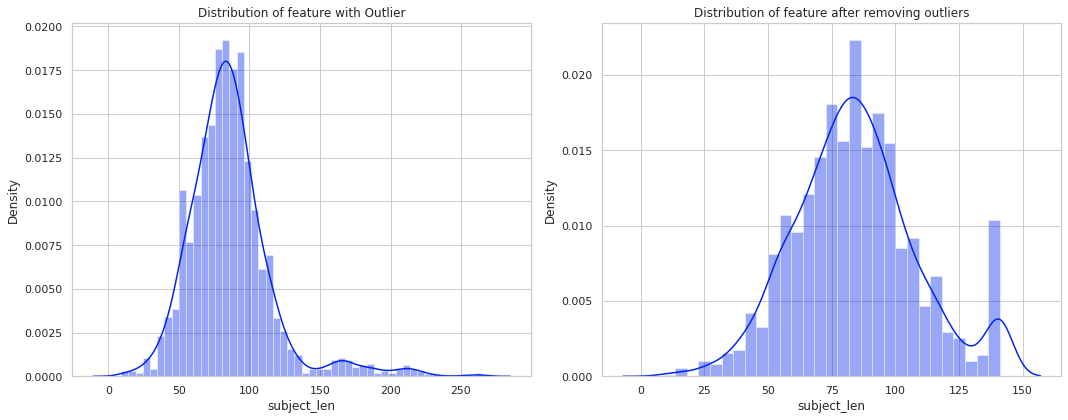

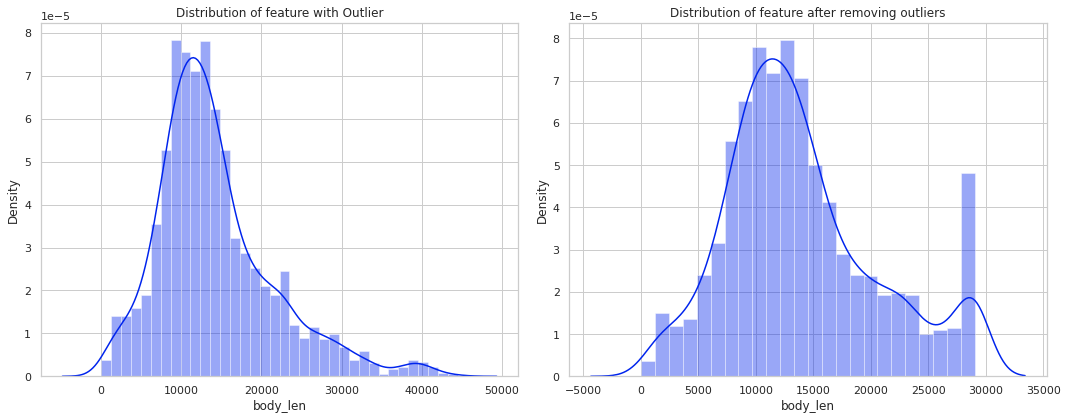

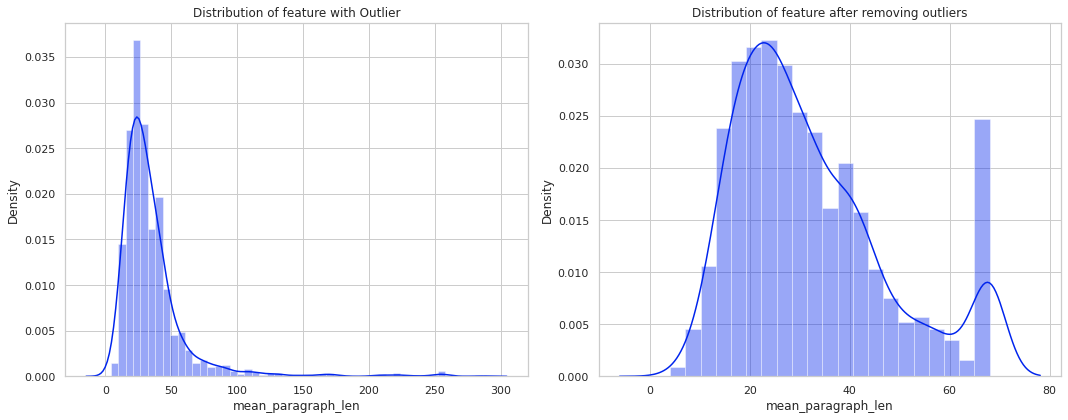

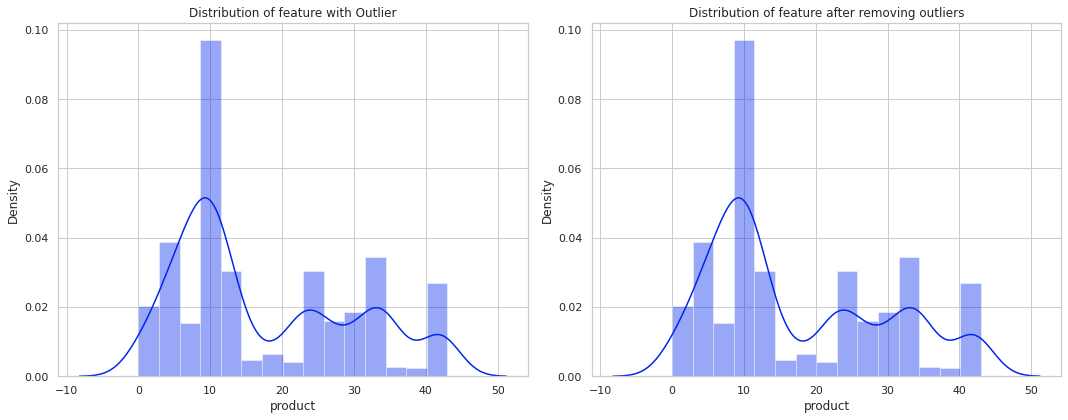

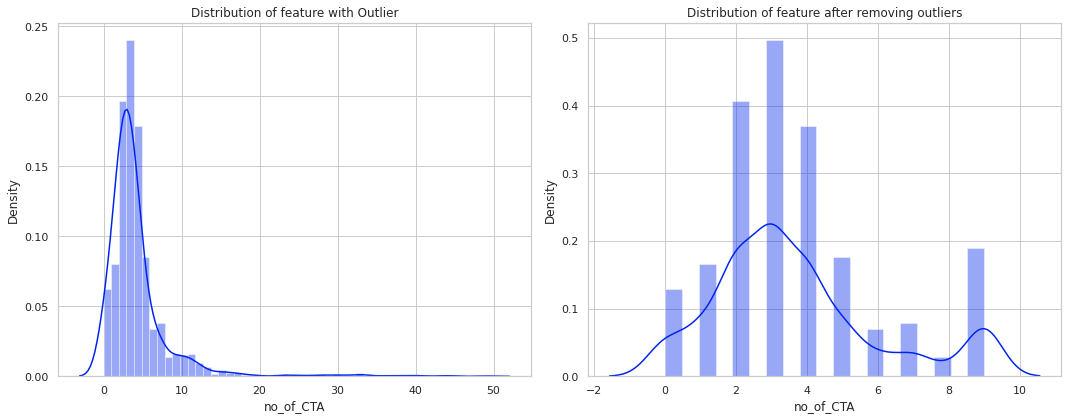

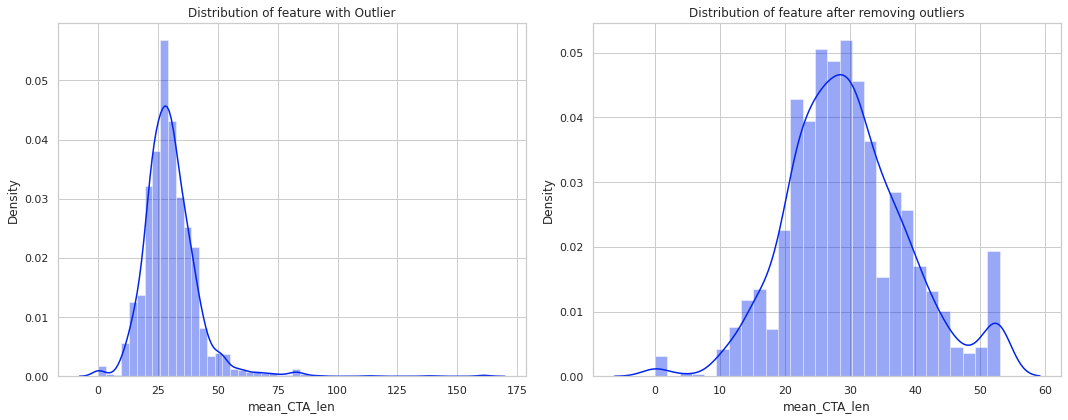

In [29]:
for feature in quantitative_features:
  handle_outlier(feature)

In [30]:
df["subject_len"].describe()

count    1888.000000
mean       84.314089
std        24.067899
min         9.000000
25%        69.000000
50%        83.000000
75%        98.000000
max       141.000000
Name: subject_len, dtype: float64

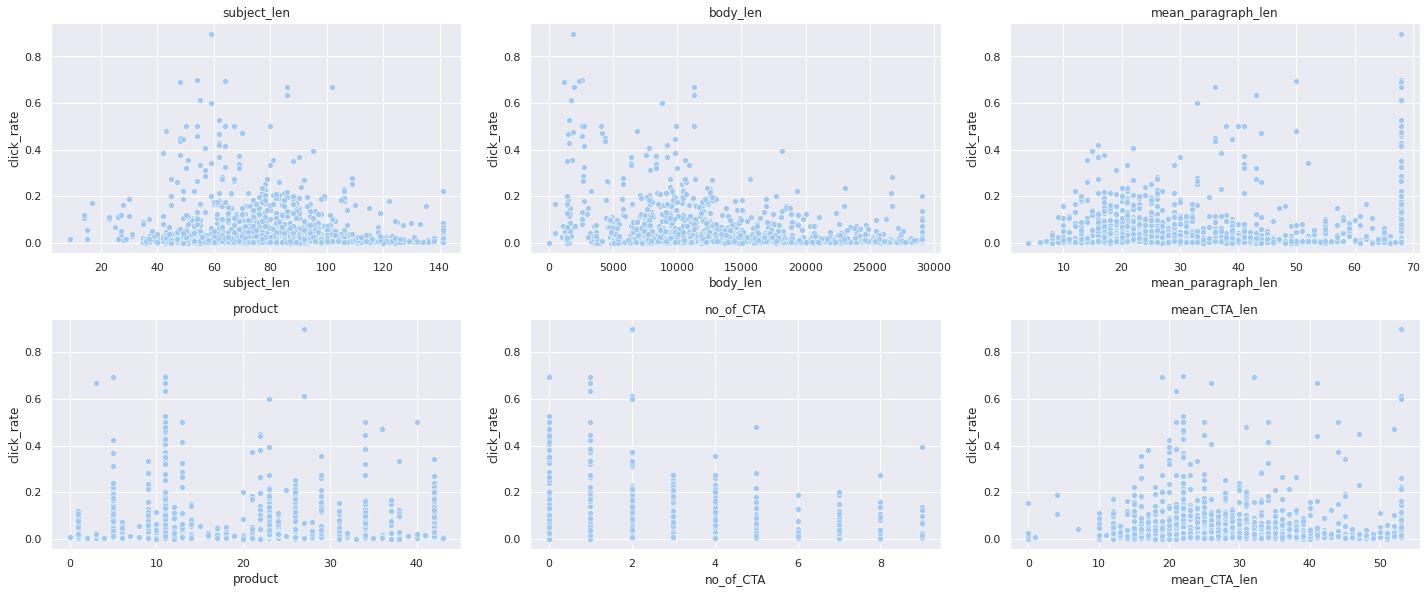

In [31]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20, 12))
i = 330
for feature in quantitative_features:
  i += 1
  plt.subplot(i)
  sns.scatterplot(df[feature],df['click_rate'])
  title1 = feature + "vs click_rate"
  plt.title(feature)
  
plt.tight_layout()
plt.show()

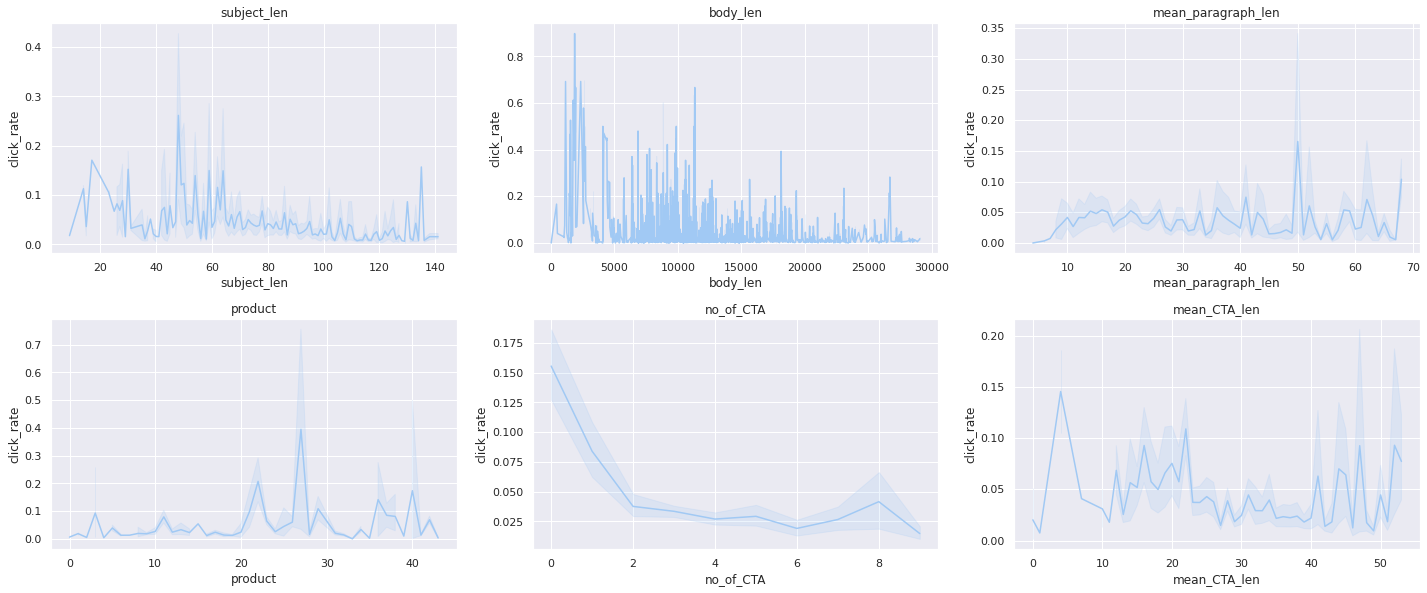

In [32]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20, 12))
i = 330
for feature in quantitative_features:
  i += 1
  plt.subplot(i)
  sns.lineplot(df[feature],df['click_rate'])
  title1 = feature + "vs click_rate"
  plt.title(feature)
  
plt.tight_layout()
plt.show()

,tmp,click_rate
tmp,1.000000,0.101341
click_rate,0.101341,1.000000


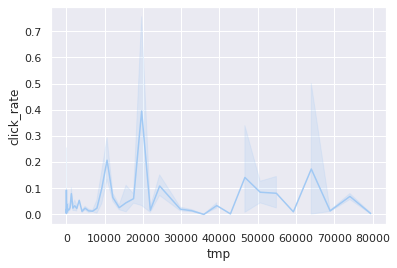

In [33]:
df['tmp'] = np.power(df['product'], 3)
sns.lineplot(df['tmp'],df['click_rate'])
df[['tmp','click_rate']].corr()

In [34]:
del df["tmp"]

In [35]:
for feature in df.columns:
  if len(df[feature].unique()) < 25:
    qualitative_features.append(feature)
    print("Feature: {} has {} classes --> {}".format(feature, len(df[feature].unique()), sorted(df[feature].unique())))

Feature: sender has 12 classes --> [0, 1, 2, 3, 6, 7, 9, 10, 11, 12, 14, 15]
Feature: is_weekend has 2 classes --> [0, 1]
Feature: times_of_day has 3 classes --> [0, 1, 2]
Feature: category has 16 classes --> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Feature: no_of_CTA has 10 classes --> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Feature: is_image has 6 classes --> [0, 1, 2, 3, 4, 6]
Feature: is_personalised has 2 classes --> [0, 1]
Feature: is_quote has 7 classes --> [0, 1, 2, 3, 4, 5, 6]
Feature: is_emoticons has 6 classes --> [0, 1, 2, 3, 4, 6]
Feature: is_discount has 2 classes --> [0, 1]
Feature: is_urgency has 2 classes --> [0, 1]
Feature: target_audience has 17 classes --> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


#Feature vs Target
Lets calculate the relationship between feature and the Target Variable

In [36]:
#orders for all the barplots in ascending order
sender = df.groupby('sender')['click_rate'].mean().reset_index().sort_values('click_rate')['sender']
times_of_day = df.groupby('times_of_day')['click_rate'].mean().reset_index().sort_values('click_rate')['times_of_day']
category = df.groupby('category')['click_rate'].mean().reset_index().sort_values('click_rate')['category']
is_image = df.groupby('is_image')['click_rate'].mean().reset_index().sort_values('click_rate')['is_image']
is_quote = df.groupby('is_quote')['click_rate'].mean().reset_index().sort_values('click_rate')['is_quote']
is_image = df.groupby('is_image')['click_rate'].mean().reset_index().sort_values('click_rate')['is_image']
is_emoticons = df.groupby('is_emoticons')['click_rate'].mean().reset_index().sort_values('click_rate')['is_emoticons']
product = df.groupby('product')['click_rate'].mean().reset_index().sort_values('click_rate')['product']
target_audience = df.groupby('target_audience')['click_rate'].mean().reset_index().sort_values('click_rate')['target_audience']

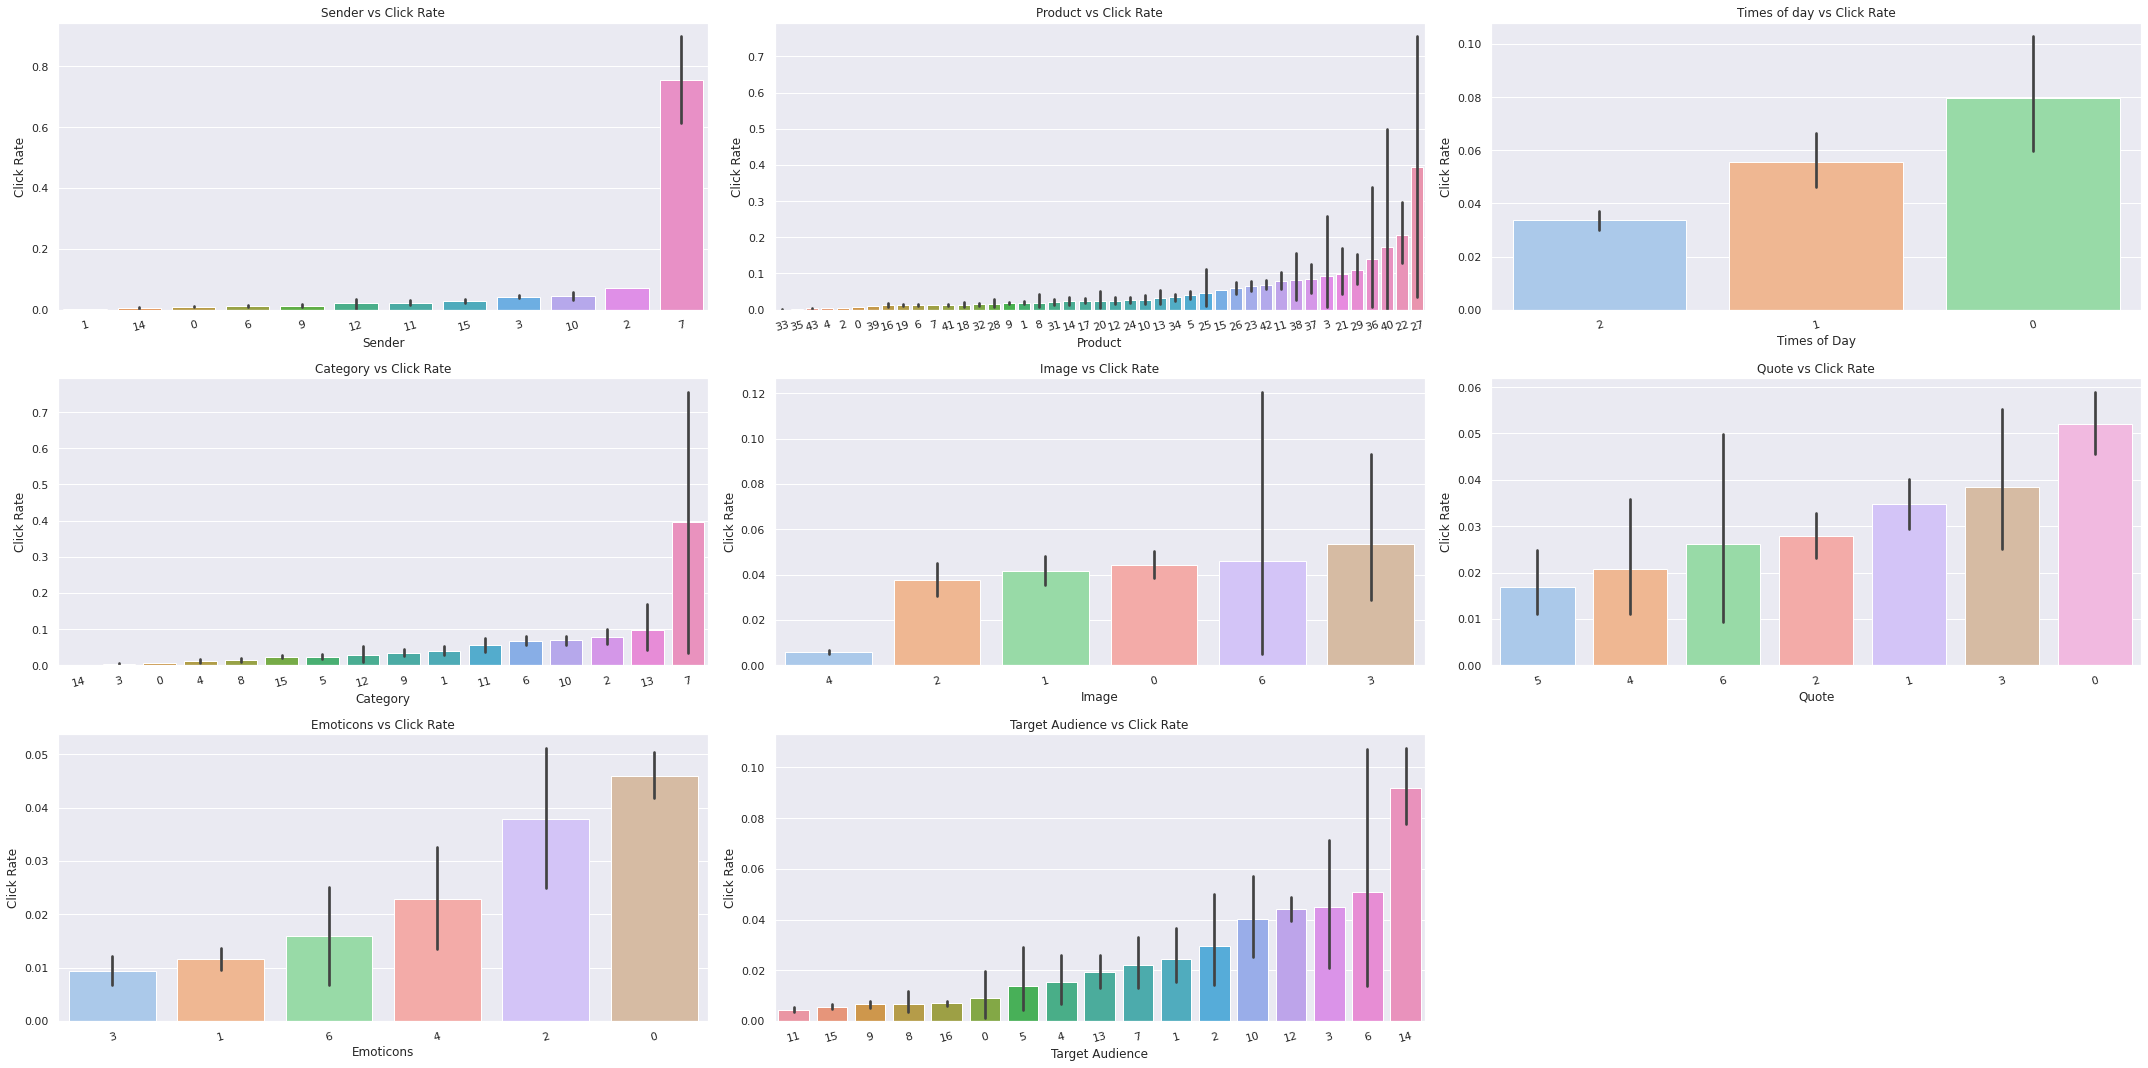

In [37]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,15))

plt.subplot(331)
sns.barplot(df['sender'],df['click_rate'],order=sender)
plt.xticks(rotation=15)
plt.xlabel('Sender')
plt.ylabel('Click Rate')
plt.title('Sender vs Click Rate')

plt.subplot(332)
sns.barplot(df['product'],df['click_rate'],order=product)
plt.xticks(rotation=15)
plt.xlabel('Product')
plt.ylabel('Click Rate')
plt.title('Product vs Click Rate')

plt.subplot(333)
sns.barplot(df['times_of_day'],df['click_rate'],order=times_of_day)
plt.xticks(rotation=15)
plt.xlabel('Times of Day')
plt.ylabel('Click Rate')
plt.title('Times of day vs Click Rate')

plt.subplot(334)
sns.barplot(df['category'],df['click_rate'],order=category)
plt.xticks(rotation=15)
plt.xlabel('Category')
plt.ylabel('Click Rate')
plt.title('Category vs Click Rate')

plt.subplot(335)
sns.barplot(df['is_image'],df['click_rate'],order=is_image)
plt.xticks(rotation=15)
plt.xlabel('Image')
plt.ylabel('Click Rate')
plt.title('Image vs Click Rate')

plt.subplot(336)
sns.barplot(df['is_quote'],df['click_rate'],order=is_quote)
plt.xticks(rotation=15)
plt.xlabel('Quote')
plt.ylabel('Click Rate')
plt.title('Quote vs Click Rate')

plt.subplot(337)
sns.barplot(df['is_emoticons'],df['click_rate'],order=is_emoticons)
plt.xticks(rotation=15)
plt.xlabel('Emoticons')
plt.ylabel('Click Rate')
plt.title('Emoticons vs Click Rate')

plt.subplot(338)
sns.barplot(df['target_audience'],df['click_rate'],order=target_audience)
plt.xticks(rotation=15)
plt.xlabel('Target Audience')
plt.ylabel('Click Rate')
plt.title('Target Audience vs Click Rate')


plt.tight_layout()
plt.show()

In [38]:
df.head()

,sender,subject_len,body_len,mean_paragraph_len,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,click_rate
0,3,76,10439,39,1,1,6,26,3,29,0,0,0,0,0,0,14,0.103079
1,3,54,2570,68,1,0,2,11,0,22,0,0,0,0,0,0,10,0.700000
2,3,59,12801,16,1,1,2,11,3,23,1,0,1,0,0,0,16,0.002769
3,3,74,11037,30,0,2,15,9,4,24,0,0,0,0,0,0,10,0.010868
4,3,80,10011,27,1,1,6,26,3,31,0,0,1,0,0,0,14,0.142826


#Segregating Dataset into X & Y

In [39]:
X_train = df.drop("click_rate",axis=1).values
y_train = df["click_rate"].values

In [40]:
df.drop("click_rate",axis=1).columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len', 'is_weekend',
       'times_of_day', 'category', 'product', 'no_of_CTA', 'mean_CTA_len',
       'is_image', 'is_personalised', 'is_quote', 'is_emoticons',
       'is_discount', 'is_urgency', 'target_audience'],
      dtype='object')

#Feature Engineering in Training data
Below are the Feature Engineering techniques performed on Training data:

**Encoding**:
- times_of_day --> Since data is Ordinal, mapped the text data to numeric based on the data weightage --> **Evening(2), Noon(1), Morning(0)**

**Features Selection:**
- campaign_id --> Removed since it will lead to model overfitting
- is_timer --> Removed as it has only one class, and Doesn't affect the performance of the model.
- is_price --> Removed as the contribution of Boolean value(True) is negligible comparing to 1.
- day_of_week --> Since day_of_week is highly correlated with is_weekend, dropping the feature.

**Boolean Value convertion:**

- As mentioned in the data description the features like ('is_weekend', 'is_image', 'is_personalised', 'is_quote', 'is_emoticons','is_discount', 'is_price', 'is_urgency') are Boolean values. But few boolean columns has outliers other than 0 and 1.

- So we are  encoding these values into 0 and 1(data greater than 1 into 1)

In [41]:
def feature_eng(dataframe):
  dataframe['times_of_day'] = dataframe['times_of_day'].map({"Evening": 2, "Noon": 1, "Morning": 0}).astype("int64")
  dataframe.drop(["campaign_id", "is_timer", "is_price", "day_of_week"], axis=1, inplace=True)
  return dataframe

In [42]:
df_test1 = pd.read_csv("https://raw.githubusercontent.com/Jaiprakash91194/CTR_Email_Campaign/main/test_data.csv", index_col=False)
df_test = feature_eng(df_test1)

In [43]:
df.shape

(1888, 18)

In [44]:
df_test.shape

(762, 17)

In [45]:
x_test = df_test.values

##**12.Building Machine Learning Model**

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
tr_x_train = ss.transform(X_train)

In [47]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

## **Extreme Gradient Boosting Regression**
####**Choosing the best Learning Rate** 

In [48]:
cross_val_xgb=[]
for lr in [0.006, 0.008, 0.01, 0.02 ]:
  xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate = lr,n_estimators=1000) 
  xgb_regressor.fit(X_train,y_train) 
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 10).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 10).mean())

[15:10:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:10:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [49]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [50]:
print("The best Learning rate is 0.01 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.01 and Cross_val_score is: 0.14136327468276905


####**Implementing Extreme Gradient Boosting Regression**

In [51]:
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate =0.01,n_estimators=1000) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model

[15:12:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, learning_rate=0.01, n_estimators=1000)

#KNN Regressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor
knn_values=np.arange(45,70)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(tr_x_train,y_train)
  print("K value : ", k, "cross_val_score : ", cross_val_score(knn_regressor,tr_x_train,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,tr_x_train,y_train,cv = 15).mean())

K value :  45 cross_val_score :  0.1001887277216174
K value :  46 cross_val_score :  0.10046854193331023
K value :  47 cross_val_score :  0.10192739780252116
K value :  48 cross_val_score :  0.10267756475943002
K value :  49 cross_val_score :  0.10532773541108831
K value :  50 cross_val_score :  0.10405229181407771
K value :  51 cross_val_score :  0.10447324177165176
K value :  52 cross_val_score :  0.10508149905230631
K value :  53 cross_val_score :  0.10682893269019585
K value :  54 cross_val_score :  0.10578924198332547
K value :  55 cross_val_score :  0.10730962704163298
K value :  56 cross_val_score :  0.107216746965105
K value :  57 cross_val_score :  0.109644256913016
K value :  58 cross_val_score :  0.10913726220493017
K value :  59 cross_val_score :  0.11037673976666862
K value :  60 cross_val_score :  0.11153451957633967
K value :  61 cross_val_score :  0.10929685316259467
K value :  62 cross_val_score :  0.11018199296616844
K value :  63 cross_val_score :  0.1091814823925774

#Model Selection
From the above inference, XGBoost model has better cross validation score comparing to KNNRegressor. 
Hence selecting XGBoost as my model to predict the output for the  given regression problem.

In [53]:
y_pred = xgb_regressor.predict(x_test)

#Create Submission file 
Extracting the output file to submit for evaluation

In [55]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv("https://raw.githubusercontent.com/Jaiprakash91194/CTR_Email_Campaign/main/sample_submission_data.csv")
dataset = pd.concat([sub_df["campaign_id"], pred], axis=1)
dataset.columns = ["campaign_id", "click_rate"]
dataset.to_csv("Submission_Final_File1.csv", index=False)